# Persona Analysis
### Comprehensive analysis of all persona variables with distributions, charts, and statistics


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'



## 1. Load JSON Files

In [2]:
# List of JSON file paths to analyze
json_files = [
    'personas/personas1759869184.9239116.json',
    'personas/personas1759869218.5306675.json',
    'personas/personas1759869291.3396184.json',
    'personas/personas1759869971.4475083.json',
]

# Load all personas
all_personas = []
file_stats = {}

for file_path in json_files:
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            file_stats[file_path] = len(data)
            all_personas.extend(data)
            print(f"✓ Loaded {len(data)} personas from {file_path}")
    except Exception as e:
        print(f"✗ Error loading {file_path}: {e}")

print(f"\n📊 Total personas loaded: {len(all_personas)}")
print(f"\n📁 File breakdown:")
for file, count in file_stats.items():
    print(f"  - {Path(file).name}: {count} personas")


✓ Loaded 5 personas from personas/personas1759869184.9239116.json
✓ Loaded 5 personas from personas/personas1759869218.5306675.json
✓ Loaded 10 personas from personas/personas1759869291.3396184.json
✓ Loaded 10 personas from personas/personas1759869971.4475083.json

📊 Total personas loaded: 30

📁 File breakdown:
  - personas1759869184.9239116.json: 5 personas
  - personas1759869218.5306675.json: 5 personas
  - personas1759869291.3396184.json: 10 personas
  - personas1759869971.4475083.json: 10 personas


## 2. Flatten and Structure Data


In [3]:
# Flatten nested JSON structure into DataFrame
def flatten_persona(persona):
    flat = {
        'id': persona.get('id'),
        'age': persona.get('age'),
        'gender': persona.get('gender'),
    }
    
    # Biological component
    bio = persona.get('biological_component', {})
    flat['bio_general_health'] = bio.get('general_health')
    flat['bio_chronic_disease'] = bio.get('chronic_disease')
    flat['bio_mobility'] = bio.get('mobility')
    senses = bio.get('senses', {})
    flat['bio_vision'] = senses.get('بینایی')
    flat['bio_hearing'] = senses.get('شنوایی')
    flat['bio_daily_energy'] = bio.get('daily_energy')
    
    # Psychological component
    psych = persona.get('psychological_component', {})
    flat['psych_personality_type'] = psych.get('personality_type')
    flat['psych_cognitive_status'] = psych.get('cognitive_status')
    flat['psych_dominant_emotion'] = psych.get('dominant_emotion')
    flat['psych_emotional_intelligence'] = psych.get('emotional_intelligence')
    flat['psych_iq'] = psych.get('iq')
    flat['psych_attitude_to_aging'] = psych.get('attitude_to_aging')
    
    # Social component
    social = persona.get('social_component', {})
    flat['social_main_role'] = social.get('main_social_role')
    flat['social_support'] = social.get('social_support')
    flat['social_participation'] = social.get('social_participation')
    
    # Economic component
    econ = persona.get('economic_component', {})
    flat['econ_income'] = econ.get('income')
    flat['econ_decile'] = econ.get('economic_decile')
    flat['econ_housing'] = econ.get('housing')
    
    # Cultural value component
    cultural = persona.get('cultural_value_component', {})
    flat['cultural_religion'] = cultural.get('religion')
    flat['cultural_moral_traits'] = cultural.get('moral_traits', [])
    flat['cultural_religiosity_level'] = cultural.get('religiosity_level')
    cultural_id = cultural.get('cultural_identity', {})
    flat['cultural_ethnicity'] = cultural_id.get('ethnicity')
    flat['cultural_language'] = cultural_id.get('language')
    flat['cultural_nationality'] = cultural_id.get('nationality')
    
    # Contextual component
    context = persona.get('contextual_component', {})
    flat['context_personal_experiences'] = context.get('personal_experiences', [])
    flat['context_historical_events'] = context.get('historical_events', [])
    flat['context_life_satisfaction'] = context.get('life_satisfaction')
    flat['context_meaning_purpose'] = context.get('meaning_and_purpose')
    
    return flat

# Create DataFrame
df = pd.DataFrame([flatten_persona(p) for p in all_personas])

print(f"📊 DataFrame shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n🔍 DataFrame Info:")
print(df.info())


📊 DataFrame shape: 30 rows × 31 columns

🔍 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            30 non-null     int64 
 1   age                           30 non-null     int64 
 2   gender                        30 non-null     object
 3   bio_general_health            30 non-null     object
 4   bio_chronic_disease           24 non-null     object
 5   bio_mobility                  30 non-null     object
 6   bio_vision                    30 non-null     object
 7   bio_hearing                   30 non-null     object
 8   bio_daily_energy              30 non-null     object
 9   psych_personality_type        30 non-null     object
 10  psych_cognitive_status        30 non-null     object
 11  psych_dominant_emotion        30 non-null     object
 12  psych_emotional_intel

## 3. Basic Statistics Overview


In [4]:
# Display first few rows
print("=" * 100)
print("SAMPLE DATA (First 3 Personas)")
print("=" * 100)
print(df.head(3).to_string())

# Basic statistics
print("\n" + "=" * 100)
print("BASIC STATISTICS")
print("=" * 100)
print(f"Total number of personas: {len(df)}")
print(f"Number of features: {df.shape[1]}")
print(f"\nMissing values per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Data types
print(f"\nData types:")
print(df.dtypes)


SAMPLE DATA (First 3 Personas)
   id  age gender bio_general_health      bio_chronic_disease    bio_mobility bio_vision bio_hearing bio_daily_energy psych_personality_type psych_cognitive_status psych_dominant_emotion psych_emotional_intelligence psych_iq psych_attitude_to_aging social_main_role   social_support social_participation     econ_income  econ_decile   econ_housing cultural_religion            cultural_moral_traits cultural_religiosity_level cultural_ethnicity cultural_language cultural_nationality                  context_personal_experiences context_historical_events context_life_satisfaction context_meaning_purpose
0   1   72      F              متوسط              دیابت نوع ۲           مستقل       ضعیف         خوب            متوسط                   ISFJ           فراموشی خفیف                   آرام                         زیاد    متوسط                   پذیرش         مادربزرگ  خانواده پرجمعیت             غیر فعال  حقوق بازنشستگی            4      خانه شخصی       مسلمان شی

## 4. Demographic Analysis (Age & Gender)


AGE DISTRIBUTION

Age statistics:
count    30.00000
mean     76.70000
std       6.71668
min      65.00000
25%      71.25000
50%      77.00000
75%      81.75000
max      89.00000
Name: age, dtype: float64

Age range: 65 - 89
Most common age: 69

Age frequency table:
age
65    1
67    1
68    1
69    3
70    1
71    1
72    1
73    3
74    1
75    1
77    2
78    2
80    3
81    1
82    1
83    1
85    3
86    1
87    1
89    1

GENDER DISTRIBUTION

Gender counts:
  F: 16 (53.33%)
  M: 14 (46.67%)


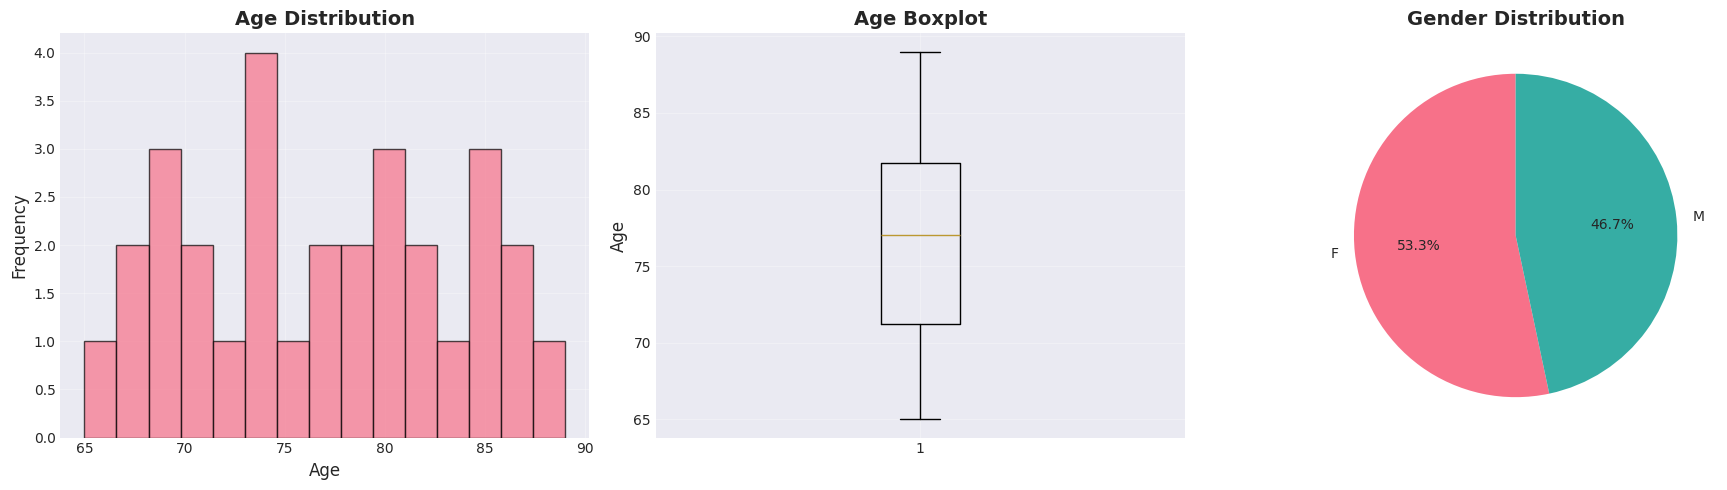


AGE BY GENDER
        count       mean       std   min    25%   50%    75%   max
gender                                                            
F        16.0  75.250000  6.371813  67.0  69.00  74.0  80.25  86.0
M        14.0  78.357143  6.946024  65.0  73.25  78.0  84.50  89.0


In [5]:
# AGE ANALYSIS
print("=" * 100)
print("AGE DISTRIBUTION")
print("=" * 100)
print(f"\nAge statistics:")
print(df['age'].describe())
print(f"\nAge range: {df['age'].min()} - {df['age'].max()}")
print(f"Most common age: {df['age'].mode()[0] if not df['age'].mode().empty else 'N/A'}")

# Age distribution table
age_counts = df['age'].value_counts().sort_index()
print(f"\nAge frequency table:")
print(age_counts.to_string())

# GENDER ANALYSIS
print("\n" + "=" * 100)
print("GENDER DISTRIBUTION")
print("=" * 100)
gender_counts = df['gender'].value_counts()
gender_pct = df['gender'].value_counts(normalize=True) * 100
print(f"\nGender counts:")
for gender, count in gender_counts.items():
    print(f"  {gender}: {count} ({gender_pct[gender]:.2f}%)")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age histogram
axes[0].hist(df['age'], bins=15, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Age boxplot
axes[1].boxplot(df['age'], vert=True)
axes[1].set_ylabel('Age', fontsize=12)
axes[1].set_title('Age Boxplot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Gender pie chart
colors = sns.color_palette('husl', len(gender_counts))
axes[2].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[2].set_title('Gender Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Age by Gender
print("\n" + "=" * 100)
print("AGE BY GENDER")
print("=" * 100)
age_by_gender = df.groupby('gender')['age'].describe()
print(age_by_gender.to_string())


## 5. Biological Component Analysis


BIOLOGICAL COMPONENT - COMPLETE ANALYSIS

GENERAL_HEALTH
Total responses: 30 (Missing: 0)

Value counts:
  متوسط: 14 (46.67%)
  ضعیف: 9 (30.00%)
  خوب: 7 (23.33%)

Unique values: 3
Available values: ['خوب', 'ضعیف', 'متوسط']

CHRONIC_DISEASE
Total responses: 24 (Missing: 6)

Value counts:
  دیابت نوع ۲: 4 (16.67%)
  آرتروز و درد مفاصل: 4 (16.67%)
  پوکی استخوان: 4 (16.67%)
  بیماری‌های قلبی و عروقی: 3 (12.50%)
  فشار خون بالا: 3 (12.50%)
  آلزایمر و زوال عقل: 2 (8.33%)
  بیماری قلبی و عروقی: 1 (4.17%)
  مشکلات گوارشی مزمن: 1 (4.17%)
  افسردگی و اضطراب مزمن: 1 (4.17%)
  بیماری مزمن کلیه: 1 (4.17%)

Unique values: 10
Available values: ['آرتروز و درد مفاصل', 'آلزایمر و زوال عقل', 'افسردگی و اضطراب مزمن', 'بیماری قلبی و عروقی', 'بیماری مزمن کلیه', 'بیماری\u200cهای قلبی و عروقی', 'دیابت نوع ۲', 'فشار خون بالا', 'مشکلات گوارشی مزمن', 'پوکی استخوان']

MOBILITY
Total responses: 30 (Missing: 0)

Value counts:
  مستقل: 15 (50.00%)
  با عصا یا واکر: 9 (30.00%)
  وابسته: 4 (13.33%)
  روی ویلچر: 2 (

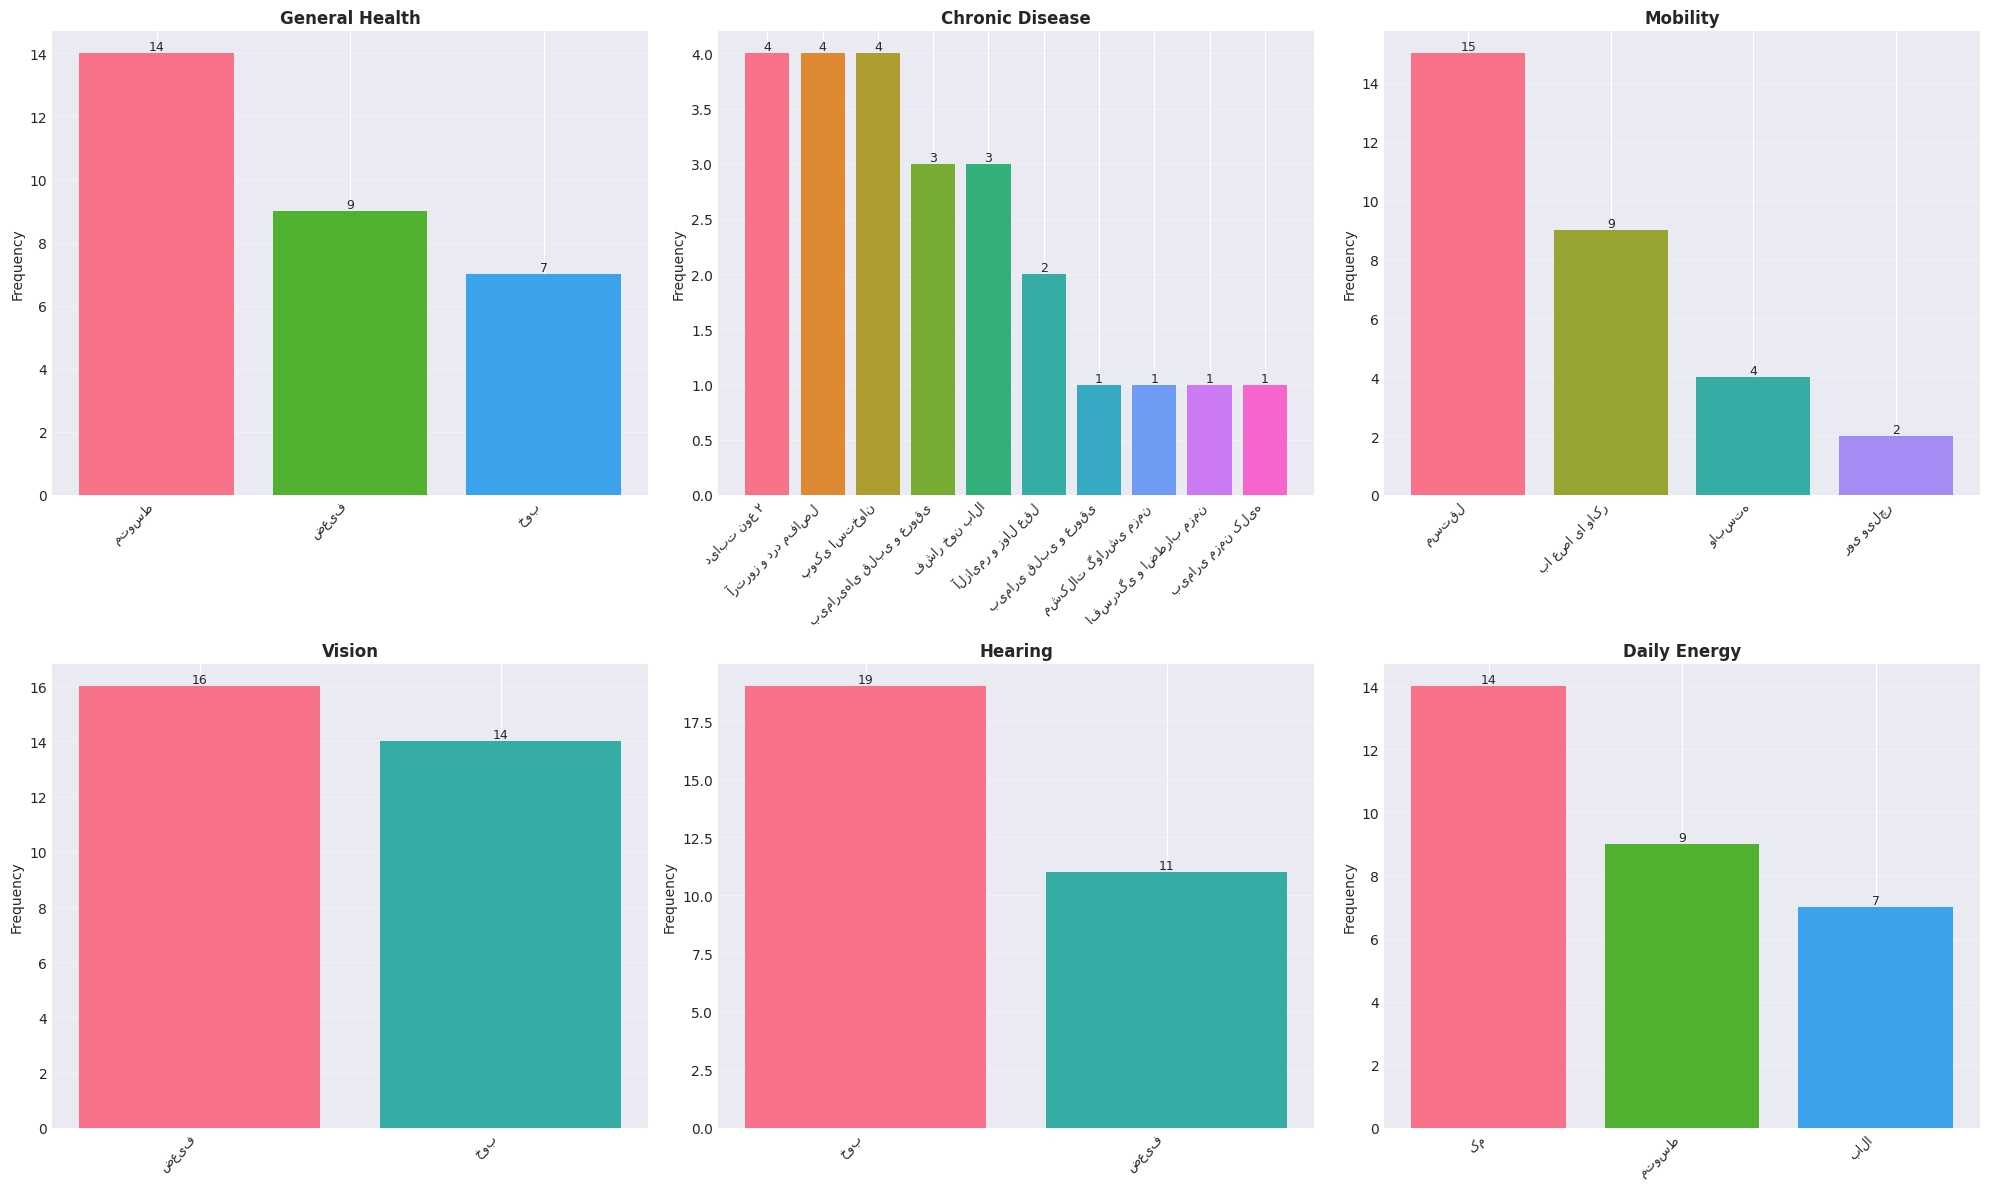


CROSS-TABULATION: General Health vs Daily Energy
bio_daily_energy    بالا  متوسط  کم  All
bio_general_health                      
خوب                    7      0   0    7
ضعیف                   0      0   9    9
متوسط                  0      9   5   14
All                    7      9  14   30

CROSS-TABULATION: Mobility vs General Health
bio_general_health  خوب  ضعیف  متوسط  All
bio_mobility                             
با عصا یا واکر        0     3      6    9
روی ویلچر             0     2      0    2
مستقل                 7     0      8   15
وابسته                0     4      0    4
All                   7     9     14   30


In [ ]:
# Biological component variables
bio_vars = ['bio_general_health', 'bio_chronic_disease', 'bio_mobility', 
            'bio_vision', 'bio_hearing', 'bio_daily_energy']

print("=" * 100)
print("BIOLOGICAL COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each biological variable
for var in bio_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper().replace('BIO_', '')}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    print(f"\nValue counts:")
    value_counts = clean_data.value_counts()
    value_pct = clean_data.value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    print(f"Available values: {sorted(clean_data.unique().tolist())}")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, var in enumerate(bio_vars):
    clean_data = df[var].dropna()
    value_counts = clean_data.value_counts()
    
    # Bar chart
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette('husl', len(value_counts)))
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(var.replace('bio_', '').replace('_', ' ').title(), 
                        fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Cross-tabulation: General Health vs Daily Energy
print("\n" + "=" * 100)
print("CROSS-TABULATION: General Health vs Daily Energy")
print("=" * 100)
crosstab = pd.crosstab(df['bio_general_health'], df['bio_daily_energy'], margins=True)
print(crosstab.to_string())

# Mobility vs General Health
print("\n" + "=" * 100)
print("CROSS-TABULATION: Mobility vs General Health")
print("=" * 100)
crosstab2 = pd.crosstab(df['bio_mobility'], df['bio_general_health'], margins=True)
print(crosstab2.to_string())


## 6. Psychological Component Analysis


PSYCHOLOGICAL COMPONENT - COMPLETE ANALYSIS

PERSONALITY_TYPE
Total responses: 30 (Missing: 0)

Value counts:
  ISFJ: 4 (13.33%)
  ENFP: 4 (13.33%)
  ISTJ: 4 (13.33%)
  ESTJ: 3 (10.00%)
  INFP: 2 (6.67%)
  ISTP: 2 (6.67%)
  INFJ: 2 (6.67%)
  INTP: 1 (3.33%)
  ENTJ: 1 (3.33%)
  ESTP: 1 (3.33%)
  INTJ: 1 (3.33%)
  ISFP: 1 (3.33%)
  ESFP: 1 (3.33%)
  ENTP: 1 (3.33%)
  ESFJ: 1 (3.33%)
  ENFJ: 1 (3.33%)

Unique values: 16
Available values: ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

COGNITIVE_STATUS
Total responses: 30 (Missing: 0)

Value counts:
  حافظه سالم: 14 (46.67%)
  فراموشی خفیف: 12 (40.00%)
  آلزایمر: 4 (13.33%)

Unique values: 3
Available values: ['آلزایمر', 'حافظه سالم', 'فراموشی خفیف']

DOMINANT_EMOTION
Total responses: 30 (Missing: 0)

Value counts:
  آرام: 10 (33.33%)
  شاد: 8 (26.67%)
  غمگین: 7 (23.33%)
  مضطرب: 5 (16.67%)

Unique values: 4
Available values: ['آرام', 'شاد', 'غمگین', 'مضطرب'

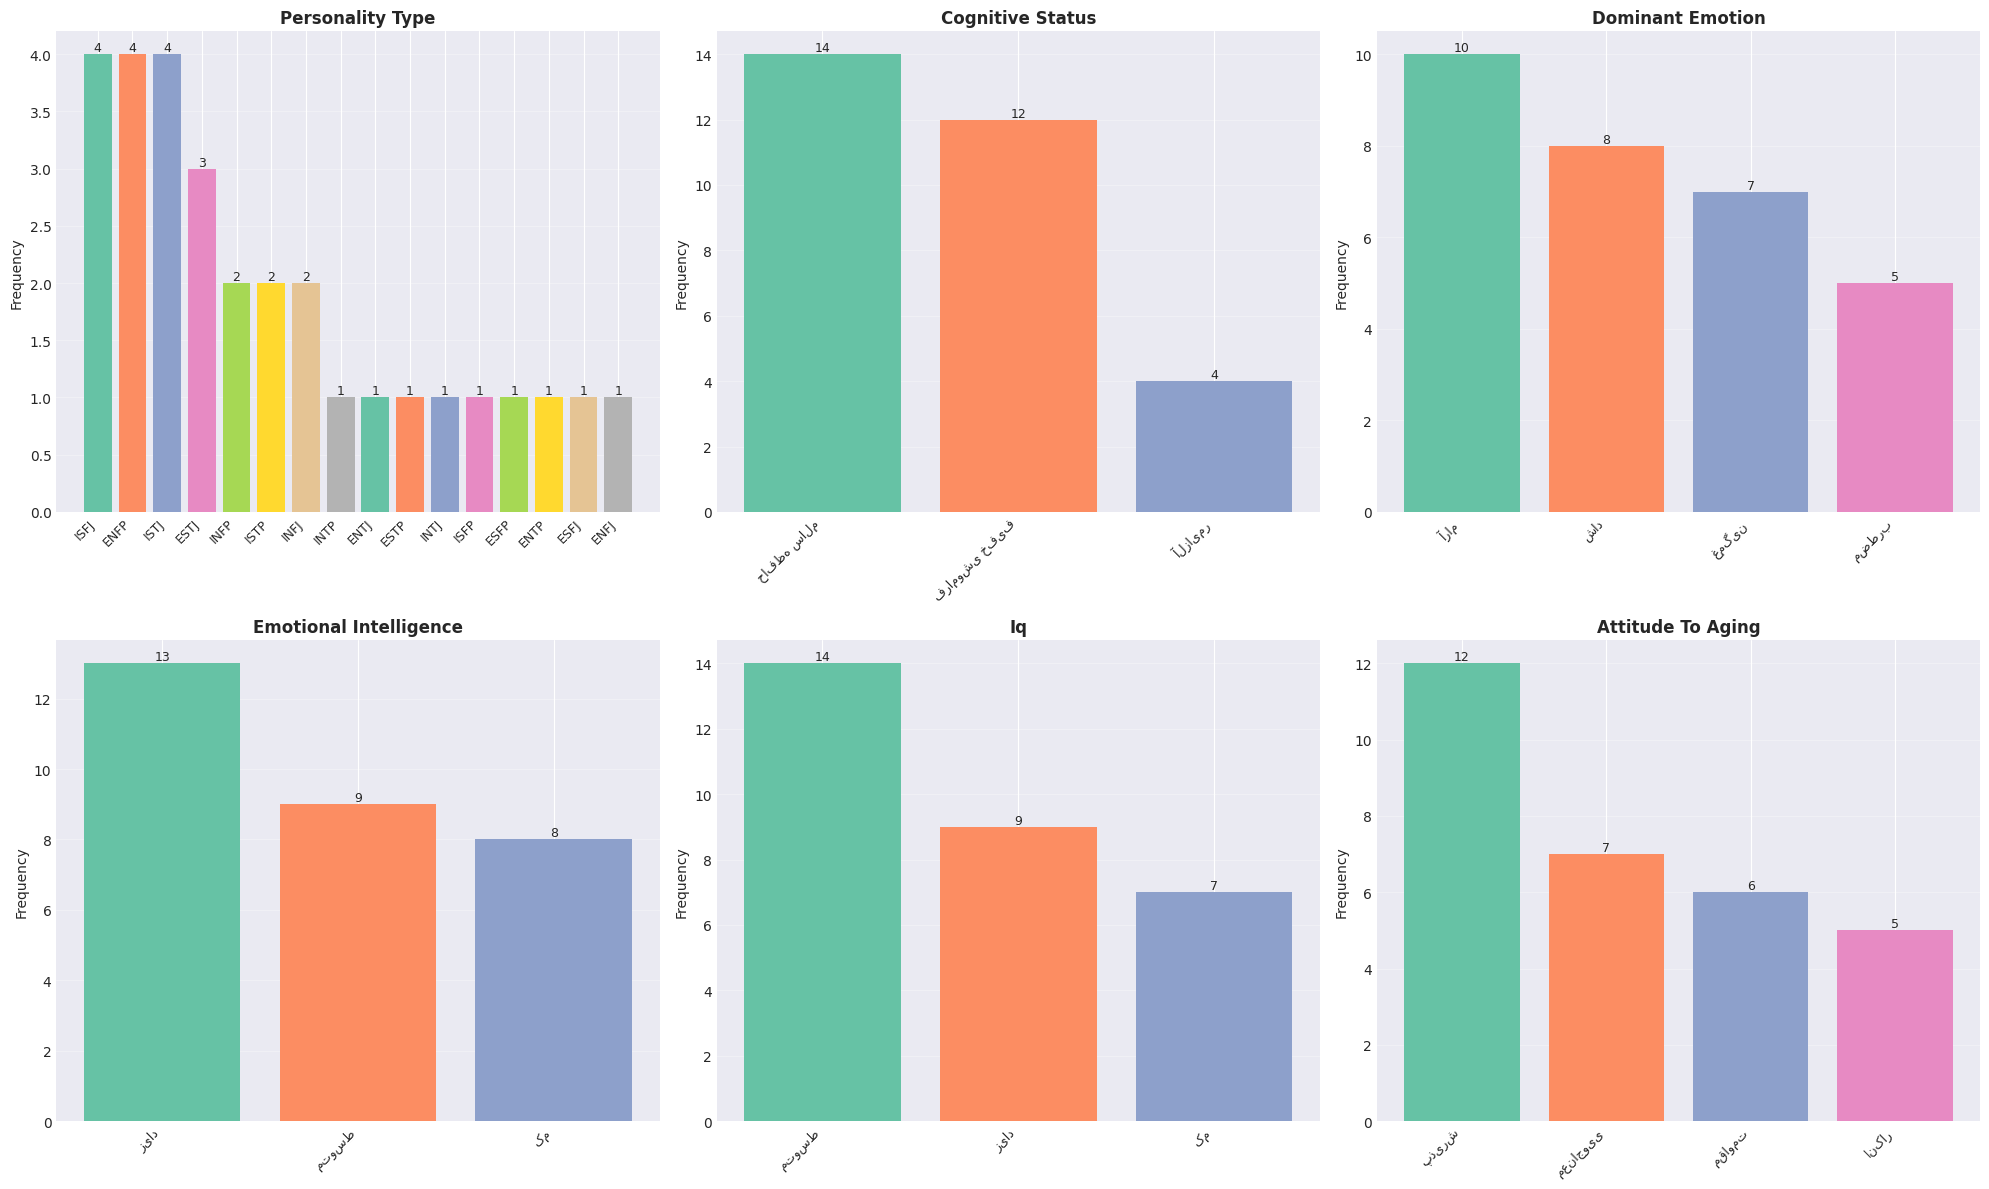


MBTI PERSONALITY TYPE BREAKDOWN
Total MBTI entries: 30

MBTI Distribution:
psych_personality_type
ISFJ    4
ENFP    4
ISTJ    4
ESTJ    3
INFP    2
ISTP    2
INFJ    2
INTP    1
ENTJ    1
ESTP    1
INTJ    1
ISFP    1
ESFP    1
ENTP    1
ESFJ    1
ENFJ    1

MBTI Dimension Analysis:
  E vs I: E=13, I=17
  S vs N: S=17, N=13
  T vs F: T=14, F=16
  J vs P: J=17, P=13

CROSS-TABULATION: Cognitive Status vs Dominant Emotion
psych_dominant_emotion  آرام  شاد  غمگین  مضطرب  All
psych_cognitive_status                              
آلزایمر                    1    0      1      2    4
حافظه سالم                 3    8      2      1   14
فراموشی خفیف               6    0      4      2   12
All                       10    8      7      5   30


In [7]:
# Psychological component variables
psych_vars = ['psych_personality_type', 'psych_cognitive_status', 'psych_dominant_emotion',
              'psych_emotional_intelligence', 'psych_iq', 'psych_attitude_to_aging']

print("=" * 100)
print("PSYCHOLOGICAL COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each psychological variable
for var in psych_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper().replace('PSYCH_', '')}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    print(f"\nValue counts:")
    value_counts = clean_data.value_counts()
    value_pct = clean_data.value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    print(f"Available values: {sorted(clean_data.unique().tolist())}")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, var in enumerate(psych_vars):
    clean_data = df[var].dropna()
    value_counts = clean_data.value_counts()
    
    # Bar chart
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette('Set2', len(value_counts)))
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(var.replace('psych_', '').replace('_', ' ').title(), 
                        fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# MBTI Personality Type Analysis
print("\n" + "=" * 100)
print("MBTI PERSONALITY TYPE BREAKDOWN")
print("=" * 100)
mbti_data = df['psych_personality_type'].dropna()
print(f"Total MBTI entries: {len(mbti_data)}")
print(f"\nMBTI Distribution:")
print(mbti_data.value_counts().to_string())

# Analyze MBTI dimensions
if len(mbti_data) > 0:
    print(f"\nMBTI Dimension Analysis:")
    mbti_list = mbti_data.tolist()
    
    # Extract dimensions
    e_i = [p[0] for p in mbti_list if len(p) == 4]
    s_n = [p[1] for p in mbti_list if len(p) == 4]
    t_f = [p[2] for p in mbti_list if len(p) == 4]
    j_p = [p[3] for p in mbti_list if len(p) == 4]
    
    print(f"  E vs I: E={e_i.count('E')}, I={e_i.count('I')}")
    print(f"  S vs N: S={s_n.count('S')}, N={s_n.count('N')}")
    print(f"  T vs F: T={t_f.count('T')}, F={t_f.count('F')}")
    print(f"  J vs P: J={j_p.count('J')}, P={j_p.count('P')}")

# Cognitive Status vs Dominant Emotion
print("\n" + "=" * 100)
print("CROSS-TABULATION: Cognitive Status vs Dominant Emotion")
print("=" * 100)
crosstab = pd.crosstab(df['psych_cognitive_status'], df['psych_dominant_emotion'], margins=True)
print(crosstab.to_string())


## 7. Social Component Analysis


SOCIAL COMPONENT - COMPLETE ANALYSIS

MAIN_ROLE
Total responses: 30 (Missing: 0)

Value counts:
  مادربزرگ: 11 (36.67%)
  بازنشسته: 8 (26.67%)
  پدربزرگ: 6 (20.00%)
  فعال اجتماعی: 5 (16.67%)

Unique values: 4
Available values: ['بازنشسته', 'فعال اجتماعی', 'مادربزرگ', 'پدربزرگ']

SUPPORT
Total responses: 30 (Missing: 0)

Value counts:
  خانواده پرجمعیت: 13 (43.33%)
  دوستان حامی: 9 (30.00%)
  حمایت دولتی: 4 (13.33%)
  تنها: 3 (10.00%)
  وابسته به فرزندان: 1 (3.33%)

Unique values: 5
Available values: ['تنها', 'حمایت دولتی', 'خانواده پرجمعیت', 'دوستان حامی', 'وابسته به فرزندان']

PARTICIPATION
Total responses: 30 (Missing: 0)

Value counts:
  غیر فعال: 17 (56.67%)
  فعال: 13 (43.33%)

Unique values: 2
Available values: ['غیر فعال', 'فعال']


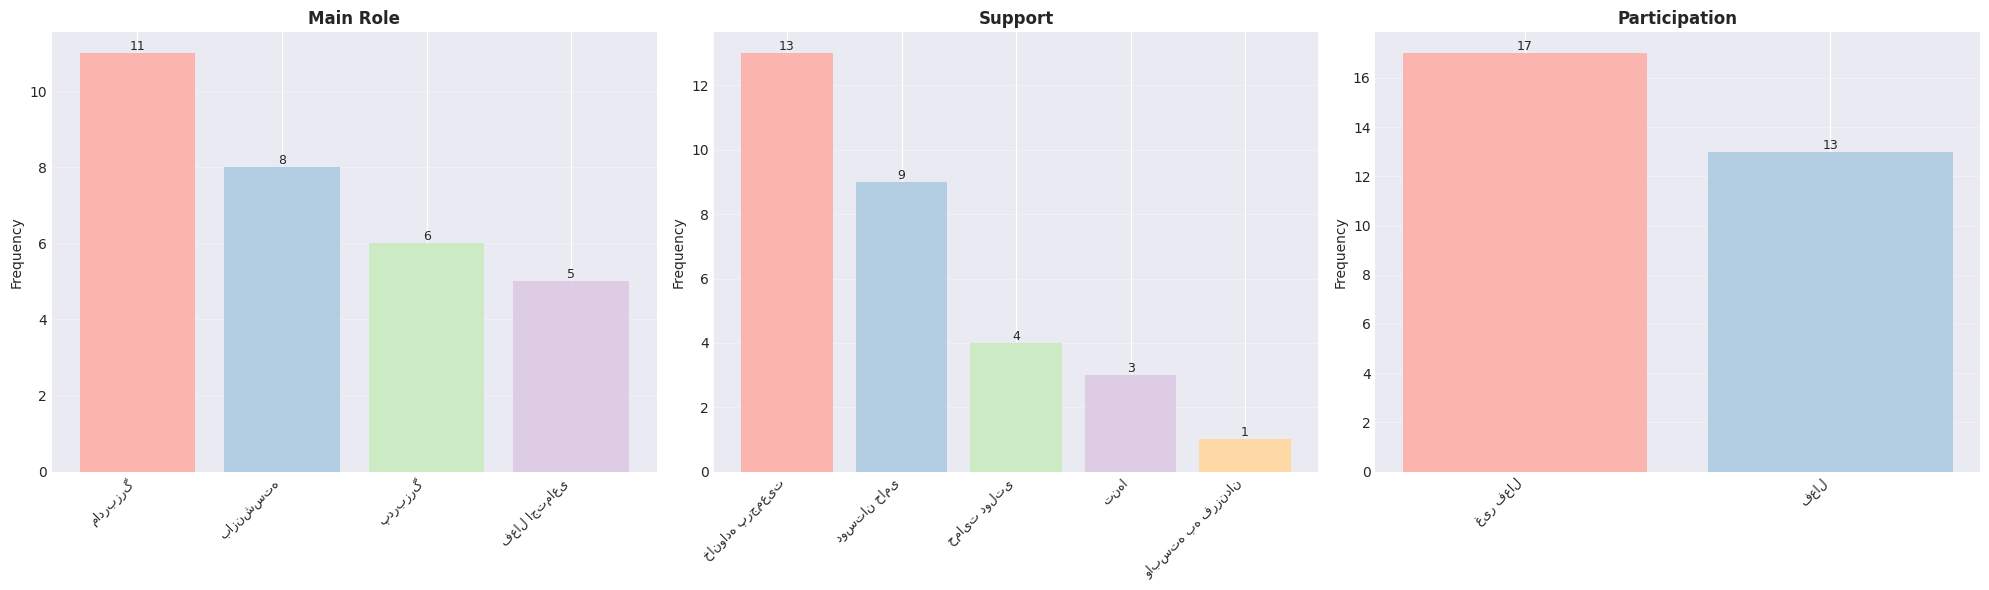


CROSS-TABULATION: Social Support vs Social Participation
social_participation  غیر فعال  فعال  All
social_support                           
تنها                         3     0    3
حمایت دولتی                  4     0    4
خانواده پرجمعیت              9     4   13
دوستان حامی                  0     9    9
وابسته به فرزندان            1     0    1
All                         17    13   30


In [8]:
# Social component variables
social_vars = ['social_main_role', 'social_support', 'social_participation']

print("=" * 100)
print("SOCIAL COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each social variable
for var in social_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper().replace('SOCIAL_', '')}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    print(f"\nValue counts:")
    value_counts = clean_data.value_counts()
    value_pct = clean_data.value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    print(f"Available values: {sorted(clean_data.unique().tolist())}")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, var in enumerate(social_vars):
    clean_data = df[var].dropna()
    value_counts = clean_data.value_counts()
    
    # Bar chart
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette('Pastel1', len(value_counts)))
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(var.replace('social_', '').replace('_', ' ').title(), 
                        fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Cross-tabulation: Social Support vs Social Participation
print("\n" + "=" * 100)
print("CROSS-TABULATION: Social Support vs Social Participation")
print("=" * 100)
crosstab = pd.crosstab(df['social_support'], df['social_participation'], margins=True)
print(crosstab.to_string())


## 8. Economic Component Analysis


In [ ]:
# Economic component variables
econ_vars = ['econ_income', 'econ_decile', 'econ_housing']

print("=" * 100)
print("ECONOMIC COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each economic variable
for var in econ_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper().replace('ECON_', '')}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    
    # For numeric data (economic_decile)
    if var == 'econ_decile':
        print(f"\nStatistics:")
        print(clean_data.describe())
        print(f"\nValue counts:")
        value_counts = clean_data.value_counts().sort_index()
    else:
        print(f"\nValue counts:")
        value_counts = clean_data.value_counts()
    
    value_pct = value_counts / len(clean_data) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    if var != 'econ_decile':
        print(f"Available values: {sorted(clean_data.unique().tolist())}")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Income
clean_data = df['econ_income'].dropna()
value_counts = clean_data.value_counts()
axes[0].bar(range(len(value_counts)), value_counts.values, 
            color=sns.color_palette('Set3', len(value_counts)))
axes[0].set_xticks(range(len(value_counts)))
axes[0].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].set_title('Income Source', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(value_counts.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Economic Decile
clean_data = df['econ_decile'].dropna()
value_counts = clean_data.value_counts().sort_index()
axes[1].bar(value_counts.index, value_counts.values, 
            color=sns.color_palette('viridis', len(value_counts)))
axes[1].set_xlabel('Economic Decile', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].set_title('Economic Decile Distribution', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in zip(value_counts.index, value_counts.values):
    axes[1].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Housing
clean_data = df['econ_housing'].dropna()
value_counts = clean_data.value_counts()
axes[2].bar(range(len(value_counts)), value_counts.values, 
            color=sns.color_palette('Set3', len(value_counts)))
axes[2].set_xticks(range(len(value_counts)))
axes[2].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
axes[2].set_ylabel('Frequency', fontsize=10)
axes[2].set_title('Housing Type', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(value_counts.values):
    axes[2].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Cross-tabulation: Income vs Housing
print("\n" + "=" * 100)
print("CROSS-TABULATION: Income vs Housing")
print("=" * 100)
crosstab = pd.crosstab(df['econ_income'], df['econ_housing'], margins=True)
print(crosstab.to_string())

# Economic Decile statistics by Income
print("\n" + "=" * 100)
print("ECONOMIC DECILE BY INCOME SOURCE")
print("=" * 100)
decile_by_income = df.groupby('econ_income')['econ_decile'].describe()
print(decile_by_income.to_string())


## 9. Cultural & Value Component Analysis


In [ ]:
# Cultural component variables (excluding moral_traits which is a list)
cultural_vars = ['cultural_religion', 'cultural_religiosity_level', 
                 'cultural_ethnicity', 'cultural_language', 'cultural_nationality']

print("=" * 100)
print("CULTURAL & VALUE COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each cultural variable
for var in cultural_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper().replace('CULTURAL_', '')}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    print(f"\nValue counts:")
    value_counts = clean_data.value_counts()
    value_pct = clean_data.value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    print(f"Available values: {sorted(clean_data.unique().tolist())}")

# MORAL TRAITS ANALYSIS (List variable)
print("\n" + "=" * 100)
print("MORAL TRAITS (LIST VARIABLE)")
print("=" * 100)

# Extract all moral traits from lists
all_moral_traits = []
for traits_list in df['cultural_moral_traits'].dropna():
    if isinstance(traits_list, list):
        all_moral_traits.extend(traits_list)

if all_moral_traits:
    moral_counts = Counter(all_moral_traits)
    print(f"Total moral trait entries: {len(all_moral_traits)}")
    print(f"Unique moral traits: {len(moral_counts)}")
    print(f"\nMoral traits frequency:")
    for trait, count in moral_counts.most_common():
        pct = (count / len(all_moral_traits)) * 100
        print(f"  {trait}: {count} ({pct:.2f}%)")
    print(f"\nAll unique moral traits: {sorted(moral_counts.keys())}")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Plot first 5 cultural variables
for idx, var in enumerate(cultural_vars):
    clean_data = df[var].dropna()
    value_counts = clean_data.value_counts()
    
    # Bar chart
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette('Spectral', len(value_counts)))
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(var.replace('cultural_', '').replace('_', ' ').title(), 
                        fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Plot moral traits in the 6th subplot
if all_moral_traits:
    moral_counts_series = pd.Series(moral_counts).sort_values(ascending=False).head(15)
    axes[5].barh(range(len(moral_counts_series)), moral_counts_series.values,
                 color=sns.color_palette('coolwarm', len(moral_counts_series)))
    axes[5].set_yticks(range(len(moral_counts_series)))
    axes[5].set_yticklabels(moral_counts_series.index, fontsize=9)
    axes[5].set_xlabel('Frequency', fontsize=10)
    axes[5].set_title('Top 15 Moral Traits', fontsize=12, fontweight='bold')
    axes[5].grid(True, alpha=0.3, axis='x')
    axes[5].invert_yaxis()

plt.tight_layout()
plt.show()

# Cross-tabulation: Religion vs Religiosity Level
print("\n" + "=" * 100)
print("CROSS-TABULATION: Religion vs Religiosity Level")
print("=" * 100)
crosstab = pd.crosstab(df['cultural_religion'], df['cultural_religiosity_level'], margins=True)
print(crosstab.to_string())

# Ethnicity vs Language
print("\n" + "=" * 100)
print("CROSS-TABULATION: Ethnicity vs Language")
print("=" * 100)
crosstab2 = pd.crosstab(df['cultural_ethnicity'], df['cultural_language'], margins=True)
print(crosstab2.to_string())


## 10. Contextual Component Analysis


In [ ]:
# Contextual component variables (excluding list variables)
context_vars = ['context_life_satisfaction', 'context_meaning_purpose']

print("=" * 100)
print("CONTEXTUAL COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each contextual variable
for var in context_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper().replace('CONTEXT_', '')}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    print(f"\nValue counts:")
    value_counts = clean_data.value_counts()
    value_pct = clean_data.value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    print(f"Available values: {sorted(clean_data.unique().tolist())}")

# PERSONAL EXPERIENCES ANALYSIS (List variable)
print("\n" + "=" * 100)
print("PERSONAL EXPERIENCES (LIST VARIABLE)")
print("=" * 100)

# Extract all personal experiences from lists
all_personal_experiences = []
for exp_list in df['context_personal_experiences'].dropna():
    if isinstance(exp_list, list):
        all_personal_experiences.extend(exp_list)

if all_personal_experiences:
    exp_counts = Counter(all_personal_experiences)
    print(f"Total personal experience entries: {len(all_personal_experiences)}")
    print(f"Unique personal experiences: {len(exp_counts)}")
    print(f"\nPersonal experiences frequency:")
    for exp, count in exp_counts.most_common():
        pct = (count / len(all_personal_experiences)) * 100
        print(f"  {exp}: {count} ({pct:.2f}%)")
    print(f"\nAll unique personal experiences: {sorted(exp_counts.keys())}")

# HISTORICAL EVENTS ANALYSIS (List variable)
print("\n" + "=" * 100)
print("HISTORICAL EVENTS (LIST VARIABLE)")
print("=" * 100)

# Extract all historical events from lists
all_historical_events = []
for events_list in df['context_historical_events'].dropna():
    if isinstance(events_list, list):
        all_historical_events.extend(events_list)

if all_historical_events:
    events_counts = Counter(all_historical_events)
    print(f"Total historical event entries: {len(all_historical_events)}")
    print(f"Unique historical events: {len(events_counts)}")
    print(f"\nHistorical events frequency:")
    for event, count in events_counts.most_common():
        pct = (count / len(all_historical_events)) * 100
        print(f"  {event}: {count} ({pct:.2f}%)")
    print(f"\nAll unique historical events: {sorted(events_counts.keys())}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Life Satisfaction
clean_data = df['context_life_satisfaction'].dropna()
value_counts = clean_data.value_counts()
axes[0,0].bar(range(len(value_counts)), value_counts.values, 
              color=sns.color_palette('Set1', len(value_counts)))
axes[0,0].set_xticks(range(len(value_counts)))
axes[0,0].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
axes[0,0].set_ylabel('Frequency', fontsize=10)
axes[0,0].set_title('Life Satisfaction', fontsize=12, fontweight='bold')
axes[0,0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(value_counts.values):
    axes[0,0].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Meaning and Purpose
clean_data = df['context_meaning_purpose'].dropna()
value_counts = clean_data.value_counts()
axes[0,1].bar(range(len(value_counts)), value_counts.values, 
              color=sns.color_palette('Set2', len(value_counts)))
axes[0,1].set_xticks(range(len(value_counts)))
axes[0,1].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
axes[0,1].set_ylabel('Frequency', fontsize=10)
axes[0,1].set_title('Meaning and Purpose', fontsize=12, fontweight='bold')
axes[0,1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(value_counts.values):
    axes[0,1].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Personal Experiences
if all_personal_experiences:
    exp_counts_series = pd.Series(exp_counts).sort_values(ascending=False).head(10)
    axes[1,0].barh(range(len(exp_counts_series)), exp_counts_series.values,
                   color=sns.color_palette('viridis', len(exp_counts_series)))
    axes[1,0].set_yticks(range(len(exp_counts_series)))
    axes[1,0].set_yticklabels(exp_counts_series.index, fontsize=9)
    axes[1,0].set_xlabel('Frequency', fontsize=10)
    axes[1,0].set_title('Top 10 Personal Experiences', fontsize=12, fontweight='bold')
    axes[1,0].grid(True, alpha=0.3, axis='x')
    axes[1,0].invert_yaxis()

# Historical Events
if all_historical_events:
    events_counts_series = pd.Series(events_counts).sort_values(ascending=False)
    axes[1,1].bar(range(len(events_counts_series)), events_counts_series.values,
                  color=sns.color_palette('plasma', len(events_counts_series)))
    axes[1,1].set_xticks(range(len(events_counts_series)))
    axes[1,1].set_xticklabels(events_counts_series.index, rotation=45, ha='right', fontsize=9)
    axes[1,1].set_ylabel('Frequency', fontsize=10)
    axes[1,1].set_title('Historical Events', fontsize=12, fontweight='bold')
    axes[1,1].grid(True, alpha=0.3, axis='y')
    for i, v in enumerate(events_counts_series.values):
        axes[1,1].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Cross-tabulation: Life Satisfaction vs Meaning and Purpose
print("\n" + "=" * 100)
print("CROSS-TABULATION: Life Satisfaction vs Meaning and Purpose")
print("=" * 100)
crosstab = pd.crosstab(df['context_life_satisfaction'], df['context_meaning_purpose'], margins=True)
print(crosstab.to_string())
